In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [2]:
#Loading the dataset

In [3]:
# Read your dataset (replace 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv' with your dataset path)
train_data = pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')

In [4]:
train_data.sample(2)

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
573,edeadfbb70ae7768099363cf76f83bf3,2020-10-07 08:34:44 +0000,NaN,0081011703195479400000002000000000067933420US,NaN,Unilever,Schmidt's,Schmidt's,Schmidts Ylang Ylang + Calendula Natural Deodo...,NaN,...,USD,111111111.0,https://i5.walmartimages.com/asr/11a9210f-ced7...,NaN,Schmidt's Ylang Ylang + Calendula Natural Deod...,NaN,5.0,1.0,NaN,092ef0a81fe4ade32c7e3b4e4a047af1
301,1c4b18e48a5893d6fee9d01f86abf6e2,2020-07-30 04:17:08 +0000,NaN,6c0f5d7c8bad60089133919752c65ad3,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111.0,https://i5.walmartimages.com/asr/57e82602-224a...,NaN,"Aquage SeaExtend Silkening Oil Foam, 8 Oz, Wal...",NaN,4.2,5.0,NaN,dba2fecdfa1a2c7dfbc617d98487ac00


In [5]:
len(train_data.columns)

32

In [6]:
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [7]:
#Insights->There are 32 columns available we will chose only Important columns

In [8]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]


In [9]:
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


##**EDA**

In [10]:
train_data.shape

(596, 10)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                596 non-null    object 
 1   Product Id             595 non-null    object 
 2   Product Rating         326 non-null    float64
 3   Product Reviews Count  453 non-null    float64
 4   Product Category       593 non-null    object 
 5   Product Brand          595 non-null    object 
 6   Product Name           595 non-null    object 
 7   Product Image Url      595 non-null    object 
 8   Product Description    492 non-null    object 
 9   Product Tags           595 non-null    object 
dtypes: float64(2), object(8)
memory usage: 46.7+ KB


In [12]:
train_data.shape

(596, 10)

In [13]:
#Checking for duplicates
train_data.duplicated().sum()

np.int64(0)

In [14]:
#insight->No duplicate columns found

In [15]:
#checking for null
train_data.isnull().sum()

,0
Uniq Id,0
Product Id,1
Product Rating,270
Product Reviews Count,143
Product Category,3
Product Brand,1
Product Name,1
Product Image Url,1
Product Description,104
Product Tags,1


In [16]:
#product rating,Product Reviews Count	,Product Description has null values

In [17]:
#Product rating->has null value means product is either new or unpopular so we will fill by 0
train_data['Product Rating']=train_data['Product Rating'].fillna(0)

In [18]:
train_data['Product Rating'].isnull().sum()

np.int64(0)

In [19]:
#Product Reviews Count->has null value means product is either new or unpopular so we will fill by 0
train_data['Product Reviews Count']=train_data['Product Reviews Count'].fillna(0)

In [20]:
train_data['Product Rating'].isnull().sum()

np.int64(0)

In [21]:

# Filling missing values in 'Product Category' with a default value (e.g., 'Unknown')
train_data['Product Category']=train_data['Product Category'].fillna('')
# Filling missing values in 'Product Brand' with a default value (e.g., 'Unknown')
train_data['Product Brand']=train_data['Product Brand'].fillna('')
# Filling missing values in 'Product Description' with an empty string
train_data['Product Description']=train_data['Product Description'].fillna('')

In [22]:
train_data.isnull().sum()

,0
Uniq Id,0
Product Id,1
Product Rating,0
Product Reviews Count,0
Product Category,0
Product Brand,0
Product Name,1
Product Image Url,1
Product Description,0
Product Tags,1


In [23]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [24]:
train_data.columns

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [25]:
#Checking out for ID columns

In [26]:
train_data['ID'][:5]

,ID
0,1705736792d82aa2f2d3caf1c07c53f4
1,95a9fe6f4810fcfc7ff244fd06784f11
2,8d4d0330178d3ed181b15a4102b287f2
3,fddc4df45b35efd886794b261f730c51
4,0990cf89a59ca6a0460349a3e4f51d42


In [27]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)

In [28]:
train_data['ID'][:4]

,ID
0,1.705737e+09
1,9.500000e+01
2,8.000000e+00
3,4.000000e+00


In [29]:
#Number of unique users
train_data['ID'].nunique()

304

In [30]:
#for prodID

In [31]:
train_data['ProdID'][0:3]

,ProdID
0,2e17bf4acecdece67fc00f07ad62c910
1,076e5854a62dd283c253d6bae415af1f
2,8a4fe5d9c7a6ed26cc44d785a454b124


In [32]:
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

In [33]:
train_data['ProdID'] [:4]

,ProdID
0,2.0
1,76.0
2,8.0
3,3.0


In [34]:
#Number of unique items
train_data['ProdID'].nunique()

296

In [35]:
#rating Column

In [36]:
train_data['Rating'][:10]

,Rating
0,0.0
1,0.0
2,4.5
3,0.0
4,0.0
5,4.6
6,4.3
7,0.0
8,5.0
9,0.0


In [37]:
train_data['Rating'].nunique()

28

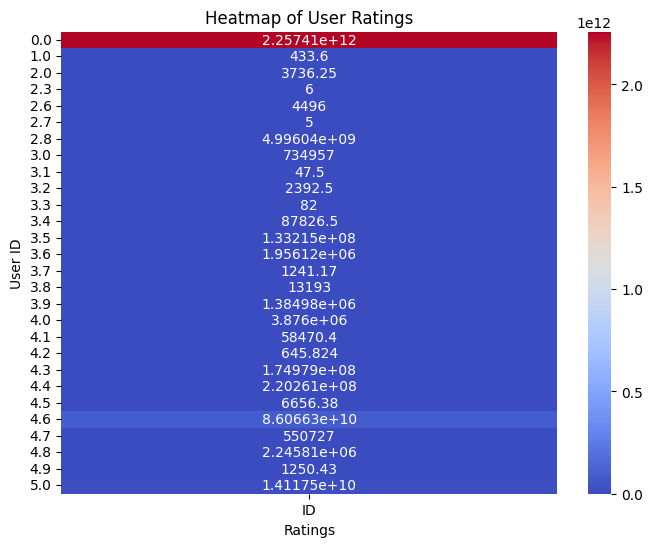

In [38]:
# Pivot the DataFrame to create a heatmap
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

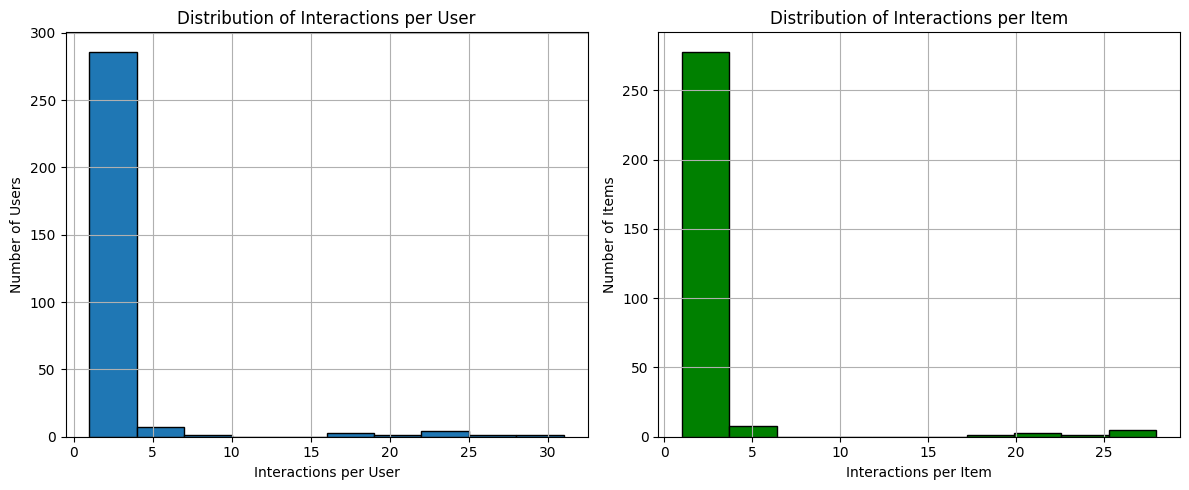

In [39]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

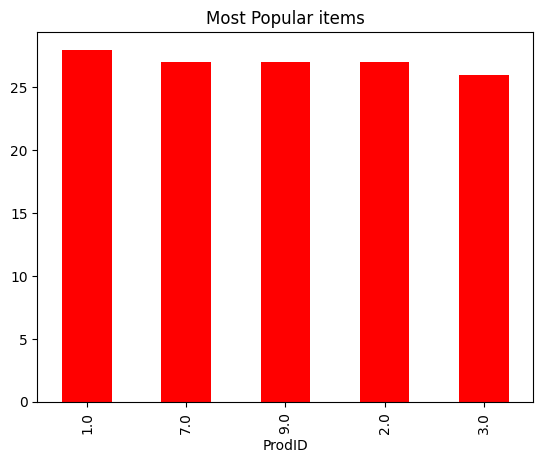

In [40]:
# Most popular items
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='Rating'>

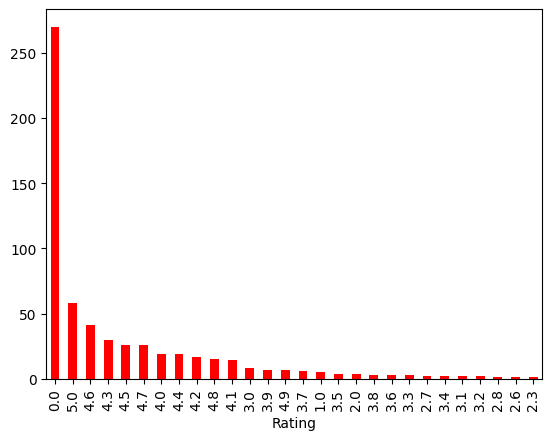

In [41]:
# most rated counts
train_data['Rating'].value_counts().plot(kind='bar',color='red')

In [42]:
#Data cleaning

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           596 non-null    float64
 1   ProdID       595 non-null    float64
 2   Rating       596 non-null    float64
 3   ReviewCount  596 non-null    float64
 4   Category     596 non-null    object 
 5   Brand        596 non-null    object 
 6   Name         595 non-null    object 
 7   ImageURL     595 non-null    object 
 8   Description  596 non-null    object 
 9   Tags         595 non-null    object 
dtypes: float64(4), object(6)
memory usage: 46.7+ KB


In [44]:
train_data.groupby('Brand')['ProdID'].count()

,ProdID
Brand,
,0
ACT,1
AG Hair,1
ATTITUDE,1
Adjust-A-Heel,1
...,...
e-cloth,1
e.l.f. Cosmetics,1
eos,1


In [45]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return  ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column]=train_data[column].apply(clean_and_extract_tags)

In [46]:
train_data['Category'][0]

'premium, beauty, premium, makeup, premium, nail, polish, care, premium, nail, polish'

In [47]:
train_data['Description'][9]

'vaseline, lip, therapy, lip, balm, mini, rosy, clinically, proven, help, heal, dry, lips, non, sticky, formulas, vaseline, lip, balm, minis, invitingly, soft, melt, lips, vaseline, lip, therapy, rosy, mini, comes, iconic, packaging, fits, neatly, pocket, purse, hydrate, vaseline, lips, perfect, lip, moisturizer, original, formula, vaseline, lip, therapy, lip, balm, rely, provides, long, lasting, relief, dryness, everyday, essential, healthy, looking, lips, pure, vaseline, jelly, like, vaseline, lip, care, products, vaseline, jelly, original, wonder, jelly, helping, heal, dry, skin, 1870, benefits, lip, balm, product, exclusively, designed, lips, protective, layer, skin, lips, thinner, rest, body, needs, lip, balm, provides, long, lasting, moisturization, formulas, help, support, natural, recovery, dry, lips, locking, moisture, perfect, elements, hard, lips, essential, moisturized, vaseline, lip, therapy, lip, balm, mini, rosy, great, safeguarding, dryness, caused, weather, confident, 

**Rating Base Recommendations System**

In [48]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [49]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [50]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
266,"Humco Holding Group Glycerin, 16 Fl. Oz.",1.0,Humco,https://i5.walmartimages.com/asr/52f2515b-09ca...,5.0
265,Hot Gro Hair Scalp Treatment Conditioner by Dr...,3.0,Dr. Miracles,https://i5.walmartimages.com/asr/9406a3d7-d615...,5.0
280,KMS Hair Play Liquid Wax - Size : 3.3 oz,1.0,KMS California,https://i5.walmartimages.com/asr/060fb48f-341a...,5.0
274,Jergens Original Scent Dry Skin Moisturizer 3 oz,3.0,Jergens,https://i5.walmartimages.com/asr/21881abc-003d...,5.0
269,It 12-in-One Amazing 2 Minute Deep Repair Trea...,3.0,It,https://i5.walmartimages.com/asr/db0d0b1a-8de8...,5.0
556,Unique Bargains 2Pcs Egyptian Cotton Pillow Co...,4.0,Unique Bargains,https://i5.walmartimages.com/asr/0276c1a8-d8d9...,5.0
289,"L.A. Colors P509 Sable Lipliner Pencil, .035 oz",2.0,L.A. Colors,https://i5.walmartimages.com/asr/c4b3eb77-627e...,5.0
543,"The Right To Shower Body Wash Joy, 16 oz",2.0,The Right To Shower,https://i5.walmartimages.com/asr/512bc1f4-0772...,5.0
45,APRICOT KERNEL OIL REFINED ORGANIC CARRIER COL...,1.0,H&B Oils Center,https://i5.walmartimages.com/asr/d71cf73a-1a5a...,5.0
39,5 Bottles PURE Plant Therapy Lymphatic Drainag...,1.0,Unbrand,https://i5.walmartimages.com/asr/cfa266d0-977c...,5.0


In [51]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)

<ipython-input-51-14a31ed65ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
<ipython-input-51-14a31ed65ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [52]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


,Name,ReviewCount,Brand,ImageURL,Rating
266,"Humco Holding Group Glycerin, 16 Fl. Oz.",1,Humco,https://i5.walmartimages.com/asr/52f2515b-09ca...,5
265,Hot Gro Hair Scalp Treatment Conditioner by Dr...,3,Dr. Miracles,https://i5.walmartimages.com/asr/9406a3d7-d615...,5
280,KMS Hair Play Liquid Wax - Size : 3.3 oz,1,KMS California,https://i5.walmartimages.com/asr/060fb48f-341a...,5
274,Jergens Original Scent Dry Skin Moisturizer 3 oz,3,Jergens,https://i5.walmartimages.com/asr/21881abc-003d...,5
269,It 12-in-One Amazing 2 Minute Deep Repair Trea...,3,It,https://i5.walmartimages.com/asr/db0d0b1a-8de8...,5
556,Unique Bargains 2Pcs Egyptian Cotton Pillow Co...,4,Unique Bargains,https://i5.walmartimages.com/asr/0276c1a8-d8d9...,5
289,"L.A. Colors P509 Sable Lipliner Pencil, .035 oz",2,L.A. Colors,https://i5.walmartimages.com/asr/c4b3eb77-627e...,5
543,"The Right To Shower Body Wash Joy, 16 oz",2,The Right To Shower,https://i5.walmartimages.com/asr/512bc1f4-0772...,5
45,APRICOT KERNEL OIL REFINED ORGANIC CARRIER COL...,1,H&B Oils Center,https://i5.walmartimages.com/asr/d71cf73a-1a5a...,5
39,5 Bottles PURE Plant Therapy Lymphatic Drainag...,1,Unbrand,https://i5.walmartimages.com/asr/cfa266d0-977c...,5


# **Content Base Recommendation system (User Preferences or Items similarities)**

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')


In [60]:
train_data['Tags'].isnull().sum()
train_data['Tags'] = train_data['Tags'].fillna('')

In [61]:
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

In [62]:
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [63]:
cosine_similarities_content

array([[1.        , 0.01560131, 0.01425507, ..., 0.01423955, 0.01710191,
        0.        ],
       [0.01560131, 1.        , 0.43043574, ..., 0.03940233, 0.04732278,
        0.        ],
       [0.01425507, 0.43043574, 1.        , ..., 0.01370285, 0.01645733,
        0.        ],
       ...,
       [0.01423955, 0.03940233, 0.01370285, ..., 1.        , 0.05583891,
        0.        ],
       [0.01710191, 0.04732278, 0.01645733, ..., 0.05583891, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
#testing
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index=train_data[train_data['Name']==item_name].index[0]

In [65]:
cosine_similarities_content[item_index] #iska sare content ke sath similarity..

array([1.        , 0.01560131, 0.01425507, 0.01628356, 0.00975628,
       0.01238993, 0.01421772, 0.14736684, 0.01788778, 0.01339777,
       0.01507034, 0.24573919, 0.01160657, 0.01586609, 0.01177513,
       0.01333465, 0.01694561, 0.01140993, 0.09024112, 0.01785143,
       0.0132182 , 0.01583873, 0.01484417, 0.01420193, 0.01659183,
       0.01287392, 0.01687204, 0.0080397 , 0.01346775, 0.01661709,
       0.01571286, 0.01500936, 0.02187205, 0.0132631 , 0.01450335,
       0.01607276, 0.01827308, 0.0167692 , 0.0158605 , 0.01160171,
       0.01602085, 0.01071369, 0.01404494, 0.01367718, 0.01643927,
       0.014043  , 0.01464648, 0.01387996, 0.01094467, 0.01687316,
       0.01337584, 0.03632398, 0.00919926, 0.01757514, 0.01732568,
       0.01224339, 0.01905958, 0.01960854, 0.01674661, 0.01267899,
       0.01982502, 0.01570816, 0.01248378, 0.00698389, 0.01357251,
       0.01659028, 0.01733979, 0.01464437, 0.01543964, 0.01297549,
       0.0128579 , 0.01231689, 0.01457341, 0.01336511, 0.03040

In [66]:
list(enumerate(cosine_similarities_content[item_index]))#iska sare content ke sath similarity..

[(0, np.float64(1.0000000000000002)),
 (1, np.float64(0.015601314383869136)),
 (2, np.float64(0.01425506908822416)),
 (3, np.float64(0.01628356429911524)),
 (4, np.float64(0.009756282464278617)),
 (5, np.float64(0.01238992775866189)),
 (6, np.float64(0.014217724520555617)),
 (7, np.float64(0.14736684209988657)),
 (8, np.float64(0.01788778312609423)),
 (9, np.float64(0.013397771510072869)),
 (10, np.float64(0.01507034482187732)),
 (11, np.float64(0.24573919175136377)),
 (12, np.float64(0.011606573900002349)),
 (13, np.float64(0.015866093854343274)),
 (14, np.float64(0.01177513367905677)),
 (15, np.float64(0.013334649304561852)),
 (16, np.float64(0.016945610532262248)),
 (17, np.float64(0.011409932444399643)),
 (18, np.float64(0.0902411226904058)),
 (19, np.float64(0.017851426433411182)),
 (20, np.float64(0.013218203904197335)),
 (21, np.float64(0.015838730794388252)),
 (22, np.float64(0.014844168609745339)),
 (23, np.float64(0.014201931976391033)),
 (24, np.float64(0.01659183232261018))

In [67]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [68]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

top_similar_items

[(237, np.float64(0.5065403782480834)),
 (591, np.float64(0.394590741955645)),
 (402, np.float64(0.3843927592815479)),
 (545, np.float64(0.3817646609143854)),
 (404, np.float64(0.3587395550364099)),
 (93, np.float64(0.3501696671772815)),
 (156, np.float64(0.32819293714414993)),
 (453, np.float64(0.30408619254015784)),
 (205, np.float64(0.303096212918158))]

In [69]:
recommended_items_indics = [x[0] for x in top_similar_items]
recommended_items_indics

[237, 591, 402, 545, 404, 93, 156, 453, 205]

In [70]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,OPI
591,Nail Lacquer - 20016 Kiss The Bride by Orly fo...,70.0,ORLY
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,OPI
545,OPI Nail Lacquer Polish .5oz/15mL - Sweet Hear...,0.0,OPI
404,"essie nail polish, minimalistic, pink sheer na...",11478.0,essie
93,"essie nail polish, bahama mama, purple nail po...",4727.0,essie
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,OPI
453,"essie Gel Couture 2-Step Longwear Nail Polish,...",9593.0,essie
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,OPI


# Function To Recommend Products for Content Base

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [72]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,OPI,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
591,Nail Lacquer - 20016 Kiss The Bride by Orly fo...,70.0,ORLY,https://i5.walmartimages.com/asr/65f5d8f4-e490...,0.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,OPI,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
545,OPI Nail Lacquer Polish .5oz/15mL - Sweet Hear...,0.0,OPI,https://i5.walmartimages.com/asr/136eb3a3-1668...,0.0
404,"essie nail polish, minimalistic, pink sheer na...",11478.0,essie,https://i5.walmartimages.com/asr/f4dd029c-c6e4...,0.0
93,"essie nail polish, bahama mama, purple nail po...",4727.0,essie,https://i5.walmartimages.com/asr/1c5cca0f-e8dd...,4.7
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,OPI,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
453,"essie Gel Couture 2-Step Longwear Nail Polish,...",9593.0,essie,https://i5.walmartimages.com/asr/7baf35d7-f335...,4.6


In [73]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
558,"Kokie Professional Nail Polish, Girls Night , ...",6.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/a6f6da7a-cb11...,4.2
426,"Milani Color Statement Matte Lipstick, Matte I...",202.0,Milani,https://i5.walmartimages.com/asr/81ec51e5-904b...,4.7
385,"Rimmel The Only 1 Matte Lipstick, Leader of Th...",0.0,Rimmel,https://i5.walmartimages.com/asr/88c2e0ff-d3ab...,0.0
397,Rimmel London Lasting Finish by Kate Nude Coll...,414.0,Rimmel,https://i5.walmartimages.com/asr/c4aee7e4-15f7...,0.0
206,"Sinful Colors Professional Nail Polish, Show &...",503.0,SinfulColors,https://i5.walmartimages.com/asr/990dd382-4c11...,4.4
464,Maybelline SuperStay Matte Ink Liquid Lipstick...,214.0,Maybelline,https://i5.walmartimages.com/asr/037312b4-b512...,4.3
504,"Sebastian Professional Light Conditioner, 8.4 ...",0.0,Sebastian Professional,https://i5.walmartimages.com/asr/766f7c11-6b76...,0.0


# Collaborative Filtering (User Item Similarity)

In [74]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)

In [75]:
user_item_matrix

ProdID,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,3.198959e+16,1.111104e+39,7.940027e+39,6.055920e+40,7.329132e+40,8.101170e+40,1.005509e+42,1.007940e+42,1.007940e+42,1.030521e+42
ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,2,0,0,4,0,0,4,3,5,0,...,0,0,0,0,0,0,0,0,0,0
1.000000e+00,4,0,3,4,0,0,4,4,0,2,...,0,4,0,0,0,0,0,0,0,0
2.000000e+00,0,4,0,4,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
3.000000e+00,0,4,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
4.000000e+00,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.095307e+10,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3.405244e+10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.187640e+11,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1.        , 0.31628626, 0.10840795, ..., 0.        , 0.        ,
        0.        ],
       [0.31628626, 1.        , 0.10484199, ..., 0.        , 0.2300895 ,
        0.        ],
       [0.10840795, 0.10484199, 1.        , ..., 0.34174306, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.34174306, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.2300895 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [77]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)
target_user_index

4

In [80]:
user_similarities = user_similarity[target_user_index]
user_similarities


array([0.05191741, 0.06694619, 0.        , 0.        , 1.        ,
       0.06434895, 0.07033799, 0.        , 0.04834388, 0.03728723,
       0.21821789, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.29095719,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21821789, 0.        , 0.        , 0.     

In [81]:
similar_user_indices = user_similarities.argsort()[::-1][1:]
similar_user_indices

array([ 54, 276, 291,  10, 236, 282,  71,   6,   1,   5,   0,   8,   9,
       100, 101,  99,  98, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 102,  82,  83,  84,  85,  86,  87,  88,  96,  90,  91,
        92,  93,  94,  95, 114,  97,  89, 133, 134, 135, 136, 137, 138,
       139, 140, 119, 142, 143, 144, 145, 146, 147, 148, 149, 141, 115,
       116, 117, 118,  81, 120, 121, 122, 132, 124, 125, 126, 127, 128,
       129, 130, 131, 123,  12,  13,  14,  15,  32,  33,  34,  74,  36,
        37,  38,  39,  40,  41,  42,  43,  35, 289, 290, 292, 293, 294,
       295, 296, 297,  11, 299, 300, 301, 302, 303,   2,   3,   7, 298,
        64,  65,  66,  67,  68,  69,  70,  44,  73, 150,  75,  76,  77,
        78,  79,  80,  72,  45,  46,  47,  48,  49,  50,  51,  52,  63,
        55,  56,  57,  58,  59,  60,  61,  62,  53, 247, 248, 249, 250,
       251, 252, 253, 254, 152, 256, 257, 258, 259, 260, 261, 262, 263,
       255, 227, 228, 229, 230, 231, 232, 233, 234, 246, 237, 23

In [82]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [83]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,OPI,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
2,Clairol Nice N Easy Permanent Color 7/106A Nat...,29221.0,Clairol,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,4.5
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
4,"Gillette TRAC II Plus Razor Blade Refills, Fit...",131.0,Gillette,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,0.0
7,BMC Bright and Loud Cream Gel Lacquer Polish S...,0.0,BMC,https://i5.walmartimages.com/asr/93f8bbf3-2dfd...,0.0
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,Clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
16,Daily Concepts Daily Body Scrubber,10.0,Daily Concepts,https://i5.walmartimages.com/asr/d3e7679d-781e...,4.4
22,"ACT Braces Care Anticavity Mouthwash (18 Oz, C...",32.0,ACT,https://i5.walmartimages.com/asr/a7fa6e41-316f...,5.0
24,Hempz Milk & Honey Herbal Body Moisturizer 2.2...,7.0,Hempz,https://i5.walmartimages.com/asr/83e236e5-392c...,0.0
27,9 Types Women Reusable Washable Panty Liner Ba...,0.0,Hilitand,https://i5.walmartimages.com/asr/dbfd76a2-cd16...,0.0


# Function That Recommend Items

In [84]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,OPI,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
2,Clairol Nice N Easy Permanent Color 7/106A Nat...,29221.0,Clairol,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,4.5
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
4,"Gillette TRAC II Plus Razor Blade Refills, Fit...",131.0,Gillette,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,0.0
7,BMC Bright and Loud Cream Gel Lacquer Polish S...,0.0,BMC,https://i5.walmartimages.com/asr/93f8bbf3-2dfd...,0.0
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,Clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
16,Daily Concepts Daily Body Scrubber,10.0,Daily Concepts,https://i5.walmartimages.com/asr/d3e7679d-781e...,4.4
22,"ACT Braces Care Anticavity Mouthwash (18 Oz, C...",32.0,ACT,https://i5.walmartimages.com/asr/a7fa6e41-316f...,5.0
24,Hempz Milk & Honey Herbal Body Moisturizer 2.2...,7.0,Hempz,https://i5.walmartimages.com/asr/83e236e5-392c...,0.0
27,9 Types Women Reusable Washable Panty Liner Ba...,0.0,Hilitand,https://i5.walmartimages.com/asr/dbfd76a2-cd16...,0.0


# Hybrid Recommendations

In [86]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()

    return hybrid_rec.head(10)

In [89]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
545,OPI Nail Lacquer Polish .5oz/15mL - Sweet Hear...,0.0,OPI,https://i5.walmartimages.com/asr/136eb3a3-1668...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,OPI,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,OPI,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,OPI,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,OPI,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,OPI,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,OPI,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
591,Nail Lacquer - 20016 Kiss The Bride by Orly fo...,70.0,ORLY,https://i5.walmartimages.com/asr/65f5d8f4-e490...,0.0
404,"essie nail polish, minimalistic, pink sheer na...",11478.0,essie,https://i5.walmartimages.com/asr/f4dd029c-c6e4...,0.0
93,"essie nail polish, bahama mama, purple nail po...",4727.0,essie,https://i5.walmartimages.com/asr/1c5cca0f-e8dd...,4.7


In [90]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
398,"IMAN Skin Tone Evener BB Crème, Light Sand",19.0,IMAN Cosmetics,https://i5.walmartimages.com/asr/b387123b-700d...,3.9
181,"Rimmel Stay Matte Liquid Lip Colour, Mwah",586.0,Rimmel,https://i5.walmartimages.com/asr/bfaa7762-31d9...,4.2
426,"Milani Color Statement Matte Lipstick, Matte I...",202.0,Milani,https://i5.walmartimages.com/asr/81ec51e5-904b...,4.7
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,Black Opal,https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0
532,"Kiss Ruby Kisses Matte Lip Lacquer, RML01 Quee...",0.0,KISS,https://i5.walmartimages.com/asr/df5a285c-157a...,0.0
430,Perfect Glow BB Cream SPF 30,9.0,Purlisse,https://i5.walmartimages.com/asr/4fe6d2c2-f680...,4.9
569,Full-On Plumping Lip Cream - Bellini by Buxom ...,0.0,Buxom,https://i5.walmartimages.com/asr/eb2327fc-d4d0...,0.0
180,"e.l.f. Lip Lacquer, Bubbles",307.0,e.l.f. Cosmetics,https://i5.walmartimages.com/asr/bebc0c9c-fd8a...,4.3
300,"Living Proof Perfect Hair Day Shampoo, 8 Oz",12.0,Living Proof,https://i5.walmartimages.com/asr/13cdf1b2-2978...,4.3
9,(3 pack) Vaseline Lip Therapy Tinted Lip Balm ...,950.0,Vaseline,https://i5.walmartimages.com/asr/6fced36e-5459...,0.0
